# Model Analysis
using the data with all the features

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [176]:
df = pd.read_csv('data_all.csv').drop('Unnamed: 0', axis=1)

### Features/Labels split

In [177]:
# Lables
y = df['target_return']

# Features
X = df.drop(['Date', 'company', 'target_return'], axis=1)

### Rescaling features

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler = StandardScaler()

In [180]:
X_scaled = scaler.fit_transform(X)

In [181]:
X_standardize = pd.DataFrame(X_scaled,columns=X.columns)
X_standardize.head()

,current_price,momentum,moving_average,moving_volatility,trading_range,exp_market_change,rates,Revenue,Cost_of_Sales,Gross_profit,...,Non_current_liabilities,Current_liabilities,net_cash_op_act,Debt_M,Debt(perc_GDP),Debt_Per_Capita,CPI_perc,GDP_Mill_dollars,GDP_Growth_perc,Unemployment_alt
0,0.571183,-1.191752,0.665252,1.008415,0.816413,-0.752487,1.614377,-0.258862,-0.247648,-0.276560,...,-0.191939,-0.183768,-0.195021,-2.320115,-1.596218,-1.896766,0.001992,0.377860,1.004574,-0.913907
1,0.646429,0.771303,0.577312,0.295273,0.519675,0.497042,0.922660,-0.259293,-0.247743,-0.277666,...,-0.191938,-0.183781,-0.196623,-2.320115,-1.596218,-1.896766,0.001992,0.377860,1.004574,-0.913907
2,0.658742,-0.575385,0.716630,0.579326,0.844317,-0.240694,0.701310,-0.258698,-0.247720,-0.275918,...,-0.191906,-0.183797,-0.194535,-2.320115,-1.596218,-1.896766,0.001992,0.377860,1.004574,-0.913907
3,0.821409,0.422697,0.738470,0.023668,0.535077,2.370180,-0.363935,-0.258394,-0.247383,-0.275685,...,-0.191866,-0.183827,-0.193934,-2.320115,-1.596218,-1.896766,0.001992,0.377860,1.004574,-0.913907
4,0.741284,-0.419215,0.751188,0.345387,0.388110,1.155783,-0.529947,-0.258221,-0.247169,-0.275599,...,-0.191854,-0.183850,-0.193499,0.357897,-0.966469,0.850759,-1.699192,1.431649,1.319792,-0.913907


### Train/Test split

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y, test_size=0.3, random_state=101)

### Training

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

In [185]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

In [186]:
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.linear_model import LinearRegression

In [187]:
poly_features = PolynomialFeatures(include_bias=True)  
X_poly = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)
poly_model = LinearRegression()  
poly_model.fit(X_poly, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [188]:
lm = LinearRegression()
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.001)
enet = ElasticNet(alpha=0.001,l1_ratio=0.8)

In [189]:
svr_poly.fit(X_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [190]:
svr_lin.fit(X_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [191]:
svr_rbf.fit(X_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [192]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [193]:
ridge.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [194]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [195]:
enet.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [196]:
pd.DataFrame(np.array([lm.intercept_, ridge.intercept_, lasso.intercept_,enet.intercept_,poly_model.intercept_]),
             columns=['Intercept'], 
             index=['Linear', 'Ridge', 'Lasso','ElasticNet','Polynomial'])

,Intercept
Linear,0.026327
Ridge,0.023940
Lasso,0.025472
ElasticNet,0.025054
Polynomial,-4.477189


In [197]:
# Create dataframe for coefficents of linear model
lm_coef = pd.DataFrame(lm.coef_,index=X.columns,columns=['Linear'])

# Create dataframe for coefficents of ridge model
ridge_coef = pd.DataFrame(ridge.coef_,index=X.columns,columns=['Ridge'])

# Create dataframe for coefficents of lasso model
lasso_coef = pd.DataFrame(lasso.coef_,index=X.columns,columns=['Lasso'])

# Create dataframe for coefficents of ElasticNet model
enet_coef = pd.DataFrame(enet.coef_,index=X.columns,columns=['ElasticNet'])

# Put dataframes together
coefs = pd.concat([lm_coef, ridge_coef, lasso_coef,enet_coef], axis=1)
coefs

,Linear,Ridge,Lasso,ElasticNet
current_price,-0.173379,-0.030485,-0.007082,-0.008359
momentum,0.013896,0.005502,0.003563,0.003810
moving_average,0.162553,0.016215,-0.000000,-0.000000
moving_volatility,0.032811,0.023150,0.015220,0.016882
trading_range,-0.013813,0.000698,-0.000000,-0.000000
exp_market_change,-0.030075,-0.027029,-0.024587,-0.025117
rates,-0.118476,-0.049283,-0.036396,-0.037475
Revenue,11.040063,-0.009656,-0.000000,-0.000000
Cost_of_Sales,-7.527556,-0.020876,-0.000000,-0.000000
Gross_profit,-3.596501,0.010862,-0.000000,-0.000000


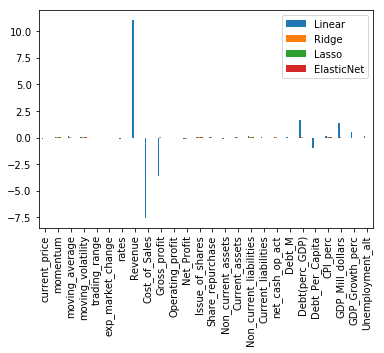

In [198]:
coefs.plot(kind='bar')

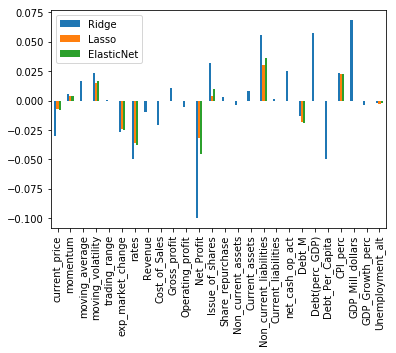

In [199]:
coefs[['Ridge','Lasso','ElasticNet']].plot(kind='bar')

### Testing

In [200]:
from sklearn import metrics

In [201]:
# Get predictions for training data
fit_lm = lm.predict(X_train)
fit_ridge = ridge.predict(X_train)
fit_lasso = lasso.predict(X_train)
fit_enet = enet.predict(X_train)
fit_poly = poly_model.predict(X_poly)
fit_svr_rbf = svr_rbf.predict(X_train)
fit_svr_lin = svr_lin.predict(X_train)
fit_svr_poly = svr_poly.predict(X_train)

# Print MSE for models
print('MSE (train)')
print('Linear:     ', metrics.mean_squared_error(y_train, fit_lm))
print('Ridge:      ', metrics.mean_squared_error(y_train, fit_ridge))
print('Lasso:      ', metrics.mean_squared_error(y_train, fit_lasso))
print('ElasticNet: ', metrics.mean_squared_error(y_train, fit_enet))
print('Polynomial: ', metrics.mean_squared_error(y_train, fit_poly))

MSE (train)
Linear:      0.0133862631582
Ridge:       0.0144211573205
Lasso:       0.0147235888857
ElasticNet:  0.014667936032
Polynomial:  1.47794561512e-24


In [202]:
print('MSE (train)')
print('Linear:     ', lm.score(X_train, y_train))
print('Ridge:      ', ridge.score(X_train, y_train))
print('Lasso:      ', lasso.score(X_train, y_train))
print('ElasticNet: ', enet.score(X_train, y_train))
print('Polynomial: ', poly_model.score(X_poly, y_train))
print('SVR_rbf:    ', svr_rbf.score(X_train, y_train))
print('SVR_lin:    ', svr_lin.score(X_train, y_train)) 
print('SVR_poly:    ', svr_poly.score(X_train, y_train))

MSE (train)
Linear:      0.176709990385
Ridge:       0.113061307044
Lasso:       0.0944609789861
ElasticNet:  0.0978837742749
Polynomial:  1.0
SVR_rbf:     0.58801104983
SVR_lin:     0.141741824842
SVR_poly:     0.449126079671


In [203]:
def adj_r2_score(model,y,yhat):
    adj = 1 - (1 - metrics.r2_score(y,yhat)) * float(len(y)-1) / (len(y)-len(model.coef_)-1)
    return adj

In [204]:
print('Adjusted R-SQUARED SCORES')
print('Linear:     ', adj_r2_score(lm, y_train, lm.predict(X_train)))
print('Ridge:      ', adj_r2_score(ridge, y_train, ridge.predict(X_train)))
print('Lasso:      ', adj_r2_score(lasso, y_train, lasso.predict(X_train)))
print('ElasticNet: ', adj_r2_score(enet, y_train, enet.predict(X_train)))
print('Polynomial: ', adj_r2_score(poly_model, y_train, poly_model.predict(X_poly)))
#print('SVR_rbf: ', adj_r2_score(svr_rbf, y_train, svr_rbf.predict(X_train)))

Adjusted R-SQUARED SCORES
Linear:      0.0819952105183
Ridge:       0.0110241122792
Lasso:       -0.00971607652874
ElasticNet:  -0.00589950833063
Polynomial:  1.0


### Predicting

In [205]:
pred_lm = lm.predict(X_test)
pred_ridge = ridge.predict(X_test)
pred_lasso = lasso.predict(X_test)
pred_enet = enet.predict(X_test)
pred_poly = poly_model.predict(X_poly_test)
pred_svr_rbf = svr_rbf.predict(X_test) 
pred_svr_lin = svr_lin.predict(X_test)
pred_svr_poly = svr_poly.predict(X_test)

### Testing

Firstly we plot the actual returns vs. the predictions by our models.

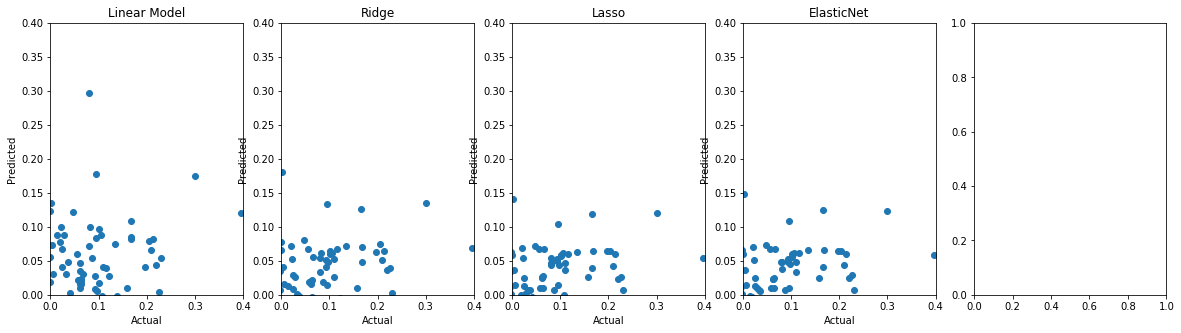

In [206]:
# Create figure and axes
f, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=5)

# Create list of titles and predictions to use in for loop
pred = [pred_lm, pred_ridge, pred_lasso, pred_enet, pred_svr_rbf]
title = ['Linear Model', 'Ridge', 'Lasso', 'ElasticNet','pred_svr_rbf']

# Loop through all axes to plot each model's results 
for i in range(4):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 0.4)
    ax[i].set_ylim(0, 0.4)
    ax[i].scatter(y_test,pred[i]) 

Secondly we calculate the MSE for each model on our testing set. 

In [207]:
print('MSE:')
print('Linear:     ', metrics.mean_squared_error(y_test, pred_lm))
print('Ridge:      ', metrics.mean_squared_error(y_test, pred_ridge))
print('Lasso:      ', metrics.mean_squared_error(y_test, pred_lasso))
print('ElasticNet: ', metrics.mean_squared_error(y_test, pred_enet))
print('Polynomial: ', metrics.mean_squared_error(y_test, pred_poly))
print('SVR_rbf:    ', metrics.mean_squared_error(y_test, pred_svr_rbf)) 
print('SVR_lin:    ', metrics.mean_squared_error(y_test, pred_svr_lin)) 
print('SVR_poly:    ', metrics.mean_squared_error(y_test, pred_svr_poly))

MSE:
Linear:      0.0261507085023
Ridge:       0.0159922145243
Lasso:       0.0137990760816
ElasticNet:  0.0139815628094
Polynomial:  361593.770117
SVR_rbf:     0.0464673310489
SVR_lin:     0.0358061020234
SVR_poly:     3.47800538923
